# Projekt 4 - Uczenie Preferencji

Wojciech Kot 151879
Oskar Kiliańczyk 151863

In [ ]:
# Ogólne importy
from typing import Tuple
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# svm - pierwsza wyjaśnialna
from sklearn import svm
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
# XGboost - druga opcja na wyjaśnialną, ale chyba bym poszedł z SVM, bo łatwiej go będzie opisać
import xgboost as xgb
from sklearn.inspection import PartialDependenceDisplay, permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import plot_tree

In [1]:
import pandas as pd
import numpy as np

# Wczytanie zbioru (brak nagłówków, więc header=None)
df = pd.read_csv("data/employee selection.csv", header=None)

# Nazwijmy kolumny roboczo (4 cechy + 1 klasa)
df.columns = ['criterion_1', 'criterion_2', 'criterion_3', 'criterion_4', 'class_raw']

# Podgląd danych
print("Pierwsze 5 wierszy danych:")
print(df.head())

# Sprawdzenie unikalnych wartości w ostatniej kolumnie
print("\nUnikalne wartości klasy (przed binarnością):")
print(df['class_raw'].unique())

# Min i max klasy
min_class = df['class_raw'].min()
max_class = df['class_raw'].max()
print(f"\nMin klasa: {min_class}, Max klasa: {max_class}")

# Binarna klasyfikacja – np. klasy >=5 to 1 (dobrzy kandydaci), reszta 0
df['class'] = (df['class_raw'] >= 5).astype(int)

# Usunięcie oryginalnej kolumny klasowej (opcjonalnie)
df = df.drop(columns=['class_raw'])

print("\nPo binarnej klasyfikacji:")
print(df.head())

# Sprawdzenie rozkładu klas
print("\nRozkład klas:")
print(df['class'].value_counts())


Pierwsze 5 wierszy danych:
   criterion_1  criterion_2  criterion_3  criterion_4  class_raw
0     0.666667     0.555556     0.666667     0.666667        6.0
1     0.555556     0.444444     0.500000     0.500000        5.0
2     0.555556     0.333333     0.333333     0.500000        4.0
3     0.666667     0.555556     0.666667     0.833333        6.0
4     0.444444     0.333333     0.166667     0.500000        3.0

Unikalne wartości klasy (przed binarnością):
[6. 5. 4. 3. 2. 7. 8. 1. 9.]

Min klasa: 1.0, Max klasa: 9.0

Po binarnej klasyfikacji:
   criterion_1  criterion_2  criterion_3  criterion_4  class
0     0.666667     0.555556     0.666667     0.666667      1
1     0.555556     0.444444     0.500000     0.500000      1
2     0.555556     0.333333     0.333333     0.500000      0
3     0.666667     0.555556     0.666667     0.833333      1
4     0.444444     0.333333     0.166667     0.500000      0

Rozkład klas:
class
1    336
0    152
Name: count, dtype: int64


## Regresja logistyczna

Accuracy: 0.9116
F1 Score: 0.9378
AUC: 0.9566


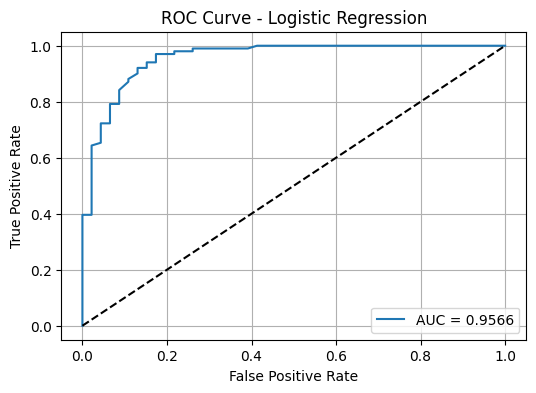

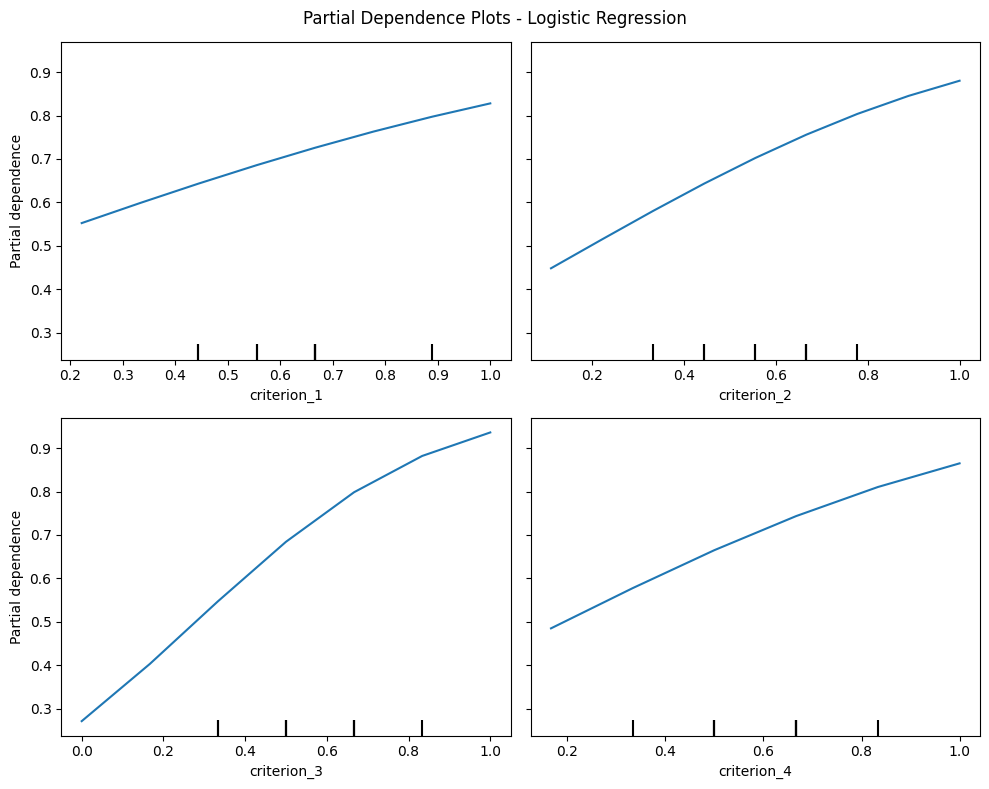


Wagi modelu (im wyższy współczynnik, tym większy wpływ):
criterion_1: 2.6221
criterion_2: 3.5214
criterion_3: 4.6685
criterion_4: 3.3985


In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import numpy as np

# 1. Wczytanie danych
df = pd.read_csv("data/employee selection.csv", header=None)
df.columns = ['criterion_1', 'criterion_2', 'criterion_3', 'criterion_4', 'class_raw']
df['class'] = (df['class_raw'] >= 5).astype(int)

# 2. Podział na cechy i etykiety
X = df[['criterion_1', 'criterion_2', 'criterion_3', 'criterion_4']]
y = df['class']

# 3. Podział na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 4. Trenowanie regresji logistycznej
model = LogisticRegression()
model.fit(X_train, y_train)

# 5. Predykcje i ocena
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

acc = round(accuracy_score(y_test, y_pred), 4)
f1 = round(f1_score(y_test, y_pred), 4)
auc = round(roc_auc_score(y_test, y_proba), 4)

print(f"Accuracy: {acc}")
print(f"F1 Score: {f1}")
print(f"AUC: {auc}")

# 6. Wykres ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

# 7. Partial Dependence Plots (dla każdej cechy)
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
PartialDependenceDisplay.from_estimator(model, X_test, [0, 1, 2, 3], ax=ax)
plt.suptitle("Partial Dependence Plots - Logistic Regression")
plt.tight_layout()
plt.show()

# 8. Wagi regresji (dla interpretacji)
print("\nWagi modelu (im wyższy współczynnik, tym większy wpływ):")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {round(coef, 4)}")



Wybrane 3 losowe próbki do interpretacji SHAP:

     criterion_1  criterion_2  criterion_3  criterion_4
236     0.666667     0.555556     0.500000     0.666667
363     1.000000     0.888889     0.666667     0.833333
230     0.444444     0.333333     0.333333     0.500000

Interpretacja próbki indeks 236:
{'criterion_1': 0.666667, 'criterion_2': 0.555556, 'criterion_3': 0.5, 'criterion_4': 0.666667}
Prawdopodobieństwo klasy 1: 0.792
Przewidywana klasa: 1


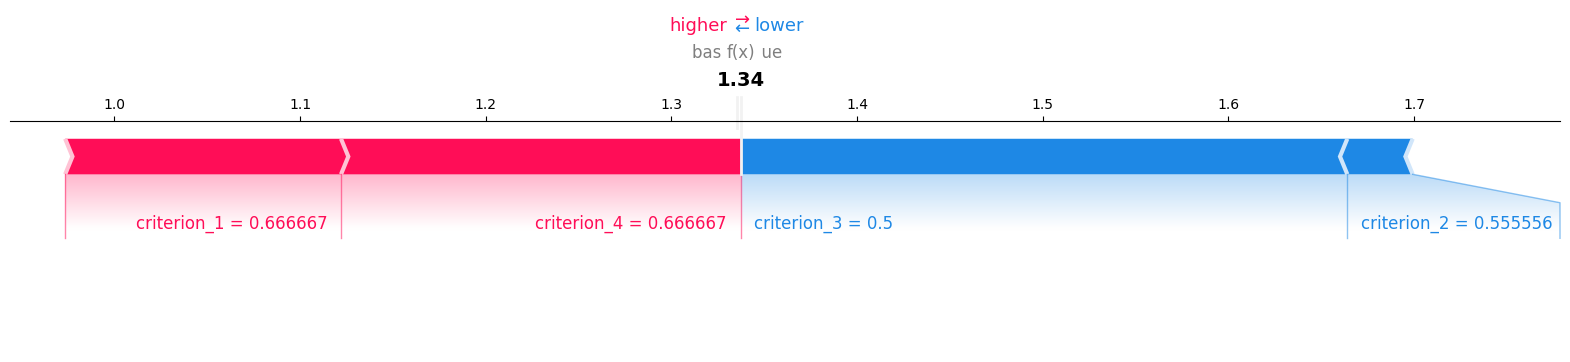

SHAP criterion_1: 0.1486
SHAP criterion_2: -0.0352
SHAP criterion_3: -0.3268
SHAP criterion_4: 0.2152

Minimalna zmiana cechy aby zmienić klasę:
  cecha: criterion_3
  zmiana: -0.2864
  nowa wartość cechy: 0.2136
Nowe prawdopodobieństwo klasy 1: 0.5
Nowa przewidywana klasa: 0
----

Interpretacja próbki indeks 363:
{'criterion_1': 1.0, 'criterion_2': 0.888889, 'criterion_3': 0.666667, 'criterion_4': 0.833333}
Prawdopodobieństwo klasy 1: 0.9912
Przewidywana klasa: 1


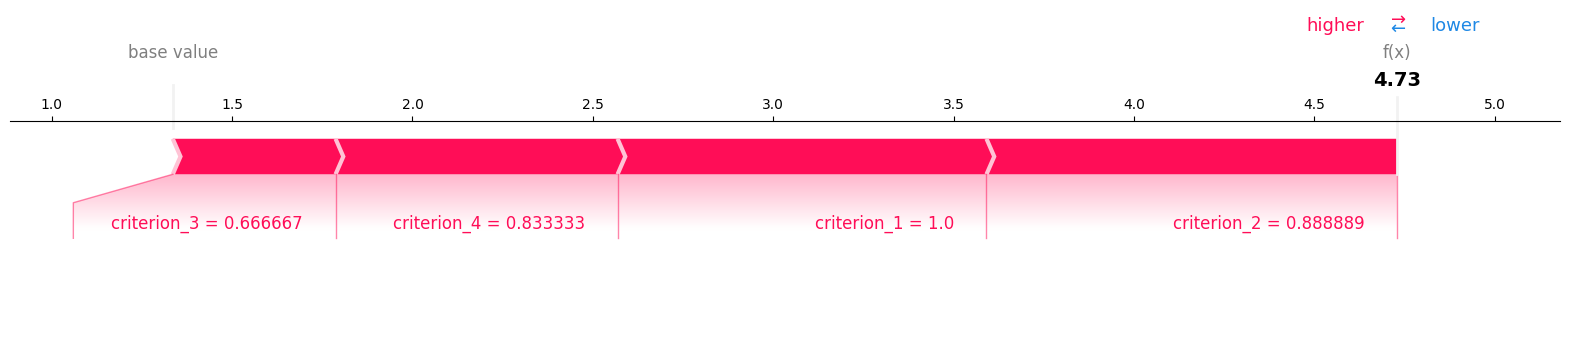

SHAP criterion_1: 1.0226
SHAP criterion_2: 1.1386
SHAP criterion_3: 0.4513
SHAP criterion_4: 0.7816

Minimalna zmiana cechy aby zmienić klasę:
  cecha: criterion_3
  zmiana: -1.0131
  nowa wartość cechy: -0.3464
Nowe prawdopodobieństwo klasy 1: 0.5
Nowa przewidywana klasa: 1
----

Interpretacja próbki indeks 230:
{'criterion_1': 0.444444, 'criterion_2': 0.333333, 'criterion_3': 0.333333, 'criterion_4': 0.5}
Prawdopodobieństwo klasy 1: 0.2022
Przewidywana klasa: 0


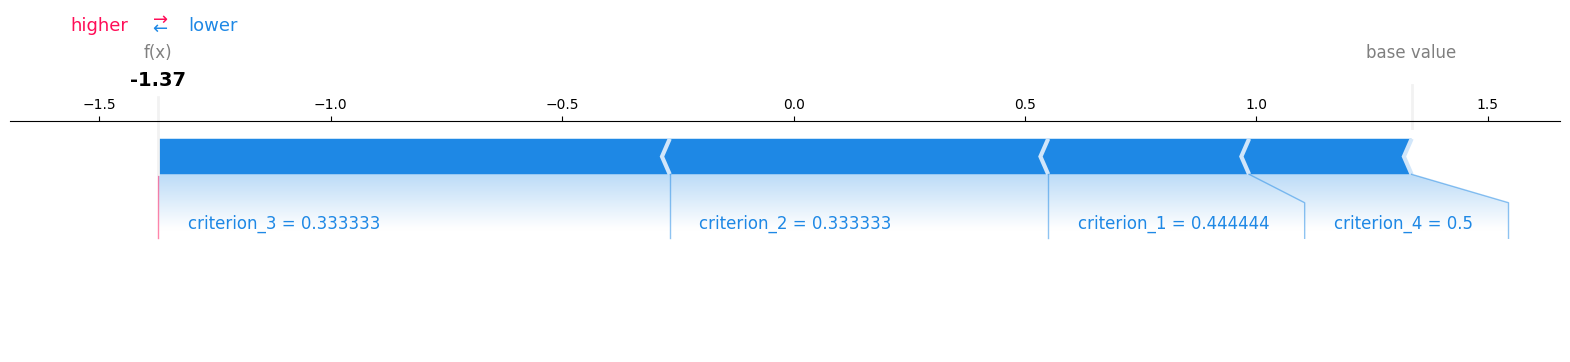

SHAP criterion_1: -0.4341
SHAP criterion_2: -0.8177
SHAP criterion_3: -1.1049
SHAP criterion_4: -0.3512

Minimalna zmiana cechy aby zmienić klasę:
  cecha: criterion_3
  zmiana: 0.294
  nowa wartość cechy: 0.6273
Nowe prawdopodobieństwo klasy 1: 0.5
Nowa przewidywana klasa: 1
----


In [7]:
!pip install shap
import shap
import random

# Inicjalizacja SHAP Explainer dla regresji logistycznej
explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")

# Wybierz 3 losowe indeksy z X_test
random.seed(42)
sample_indices = random.sample(list(X_test.index), 3)
samples = X_test.loc[sample_indices]

print("\nWybrane 3 losowe próbki do interpretacji SHAP:\n")
print(samples)

def minimal_change_to_flip(instance, model, threshold=0.5):
    coefs = model.coef_[0]
    intercept = model.intercept_[0]
    x = instance.values
    logit = np.dot(coefs, x) + intercept
    pred_class = int((1/(1+np.exp(-logit))) >= threshold)

    min_change = None
    min_feature = None

    for i, feat in enumerate(X.columns):
        coef = coefs[i]
        if coef == 0:
            continue
        delta = -logit / coef
        if min_change is None or abs(delta) < abs(min_change):
            min_change = delta
            min_feature = feat
    return min_feature, min_change

for idx in sample_indices:
    instance = X_test.loc[idx]
    print(f"\nInterpretacja próbki indeks {idx}:\n{instance.to_dict()}")

    shap_values = explainer.shap_values(instance)
    base_value = explainer.expected_value

    # Wartość predykcji modelu
    logit = np.dot(model.coef_[0], instance.values) + model.intercept_[0]
    prob = 1 / (1 + np.exp(-logit))
    pred_class = int(prob >= 0.5)

    print(f"Prawdopodobieństwo klasy 1: {round(prob,4)}")
    print(f"Przewidywana klasa: {pred_class}")

    # Wykres SHAP dla pojedynczej próbki
    shap.initjs()
    shap.force_plot(base_value, shap_values, instance, matplotlib=True, show=True)

    # Wypisz wartości SHAP (wpływ cech)
    for f, v in zip(X.columns, shap_values):
        print(f"SHAP {f}: {round(v,4)}")

    # Minimalna zmiana cechy do zmiany klasy
    feat, delta = minimal_change_to_flip(instance, model)
    print(f"\nMinimalna zmiana cechy aby zmienić klasę:")
    print(f"  cecha: {feat}")
    print(f"  zmiana: {round(delta,4)}")
    print(f"  nowa wartość cechy: {round(instance[feat] + delta, 4)}")

    # Weryfikacja
    changed_instance = instance.copy()
    changed_instance[feat] += delta
    logit_changed = np.dot(model.coef_[0], changed_instance.values) + model.intercept_[0]
    prob_changed = 1 / (1 + np.exp(-logit_changed))
    pred_changed = int(prob_changed >= 0.5)
    print(f"Nowe prawdopodobieństwo klasy 1: {round(prob_changed,4)}")
    print(f"Nowa przewidywana klasa: {pred_changed}")
    print("----")


## ANN-MCDA

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
ANN-UTADIS (odcinkowo liniowy, monotoniczny)
Accuracy: 0.9048
F1 Score: 0.9314
AUC: 0.9424


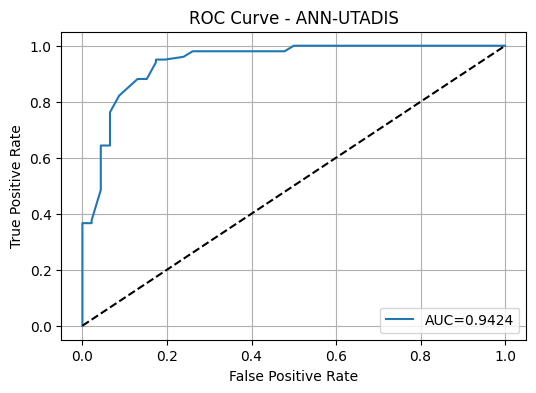

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


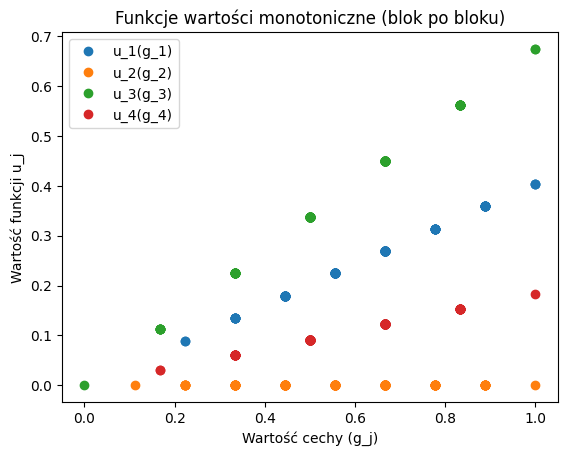

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, ReLU, Concatenate, Add, Lambda
from tensorflow.keras.constraints import NonNeg
import matplotlib.pyplot as plt

# 1. Wczytanie danych i przygotowanie
df = pd.read_csv("data/employee selection.csv", header=None)
df.columns = ['criterion_1', 'criterion_2', 'criterion_3', 'criterion_4', 'class_raw']
df['class'] = (df['class_raw'] >= 5).astype(int)

X = df[['criterion_1', 'criterion_2', 'criterion_3', 'criterion_4']].values
y = df['class'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# 2. Definicja monotonicznego bloku dla jednego kryterium
def monotonic_block(input_layer, segments=3):
    # input_layer shape = (None, 1)
    x = Dense(segments, activation='relu', use_bias=False, kernel_constraint=NonNeg())(input_layer)
    # suma wyjść warstwy - reprezentuje odcinkowo liniową funkcję wartości
    out = tf.keras.layers.Lambda(lambda z: tf.reduce_sum(z, axis=1, keepdims=True))(x)
    return out

# 3. Wejścia - osobno dla każdego kryterium
inputs = [Input(shape=(1,)) for _ in range(4)]

# 4. Przetwarzanie każdego kryterium osobnym monotonicznym blokiem
outputs = [monotonic_block(inp) for inp in inputs]

# 5. Sumowanie wyników funkcji wartości
summed = Add()(outputs)

# 6. Model
model = Model(inputs=inputs, outputs=summed)
model.compile(optimizer='adam', loss='mse')  # regresja na sumę wartości

# 7. Przygotowanie danych wejściowych jako listy 4 macierzy 1D
X_train_list = [X_train[:, i].reshape(-1, 1) for i in range(4)]
X_test_list = [X_test[:, i].reshape(-1, 1) for i in range(4)]

# 8. "Target" - zamiast klasy uczymy model przybliżać "surową wartość klasy" (np. 0 lub 1)
# W praktyce można próbować wartości binarnych, aby uczyć funkcję wartości

y_train_float = y_train.astype(float).reshape(-1,1)

# 9. Trenowanie modelu
history = model.fit(X_train_list, y_train_float, epochs=100, batch_size=16, verbose=0,
                    validation_split=0.2)

# 10. Predykcje
U_train = model.predict(X_train_list)
U_test = model.predict(X_test_list)

# 11. Normalizacja globalna (min-max) względem wariantów idealnego (max) i antyidealnego (min)
U_max = np.max(U_train)
U_min = np.min(U_train)

def normalize_U(U):
    return (U - U_min) / (U_max - U_min + 1e-9)

U_test_norm = normalize_U(U_test)

# 12. Progowanie (np. prosty próg 0.5 dla klasyfikacji binarnej)
y_pred = (U_test_norm >= 0.5).astype(int).flatten()

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, U_test_norm)

print(f"ANN-UTADIS (odcinkowo liniowy, monotoniczny)\nAccuracy: {acc:.4f}\nF1 Score: {f1:.4f}\nAUC: {auc:.4f}")

# 13. Wykres ROC
fpr, tpr, _ = roc_curve(y_test, U_test_norm)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC={auc:.4f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - ANN-UTADIS")
plt.legend()
plt.grid(True)
plt.show()

# 14. Interpretacja funkcji wartości u_j - możemy przeanalizować wyjścia bloków dla punktów testowych
for i, out_block in enumerate(outputs):
    func_values = Model(inputs, out_block).predict(X_test_list)
    plt.plot(X_test[:, i], func_values, 'o', label=f'u_{i+1}(g_{i+1})')
plt.xlabel("Wartość cechy (g_j)")
plt.ylabel("Wartość funkcji u_j")
plt.title("Funkcje wartości monotoniczne (blok po bloku)")
plt.legend()
plt.show()


Wybrane warianty:
     kryterium1  kryterium2  kryterium3  kryterium4
125    0.555556    0.666667    0.500000    0.500000
51     0.555556    0.444444    0.666667    0.666667
138    0.666667    0.888889    0.833333    0.666667
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step

Predykcje klas i wartości użyteczności:
Wariant 125: Klasa=1, Użyteczność=0.6526
Wariant 51: Klasa=1, Użyteczność=0.7954
Wariant 138: Klasa=1, Użyteczność=0.9525

Testy zmiany cech (dla pierwszego wariantu):
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
 Kryterium kryterium1: minimalna zmiana = -0.3822, nowa klasa = 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Gradient zerowy, nie można wyliczyć minimalnej zmiany.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
 Kryterium kryterium3: minimalna zmiana = -0.2266, nowa klasa = 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/ste

  0%|          | 0/3 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 33%|███▎      | 1/3 [00:00<00:00,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 67%|██████▋   | 2/3 [00:00<00:00,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


100%|██████████| 3/3 [00:00<00:00,  3.33it/s]


SHAP values dla wariantu 125:


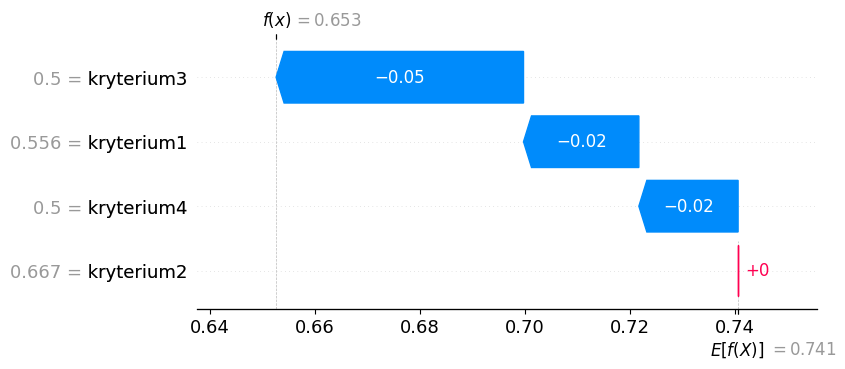


SHAP values dla wariantu 51:


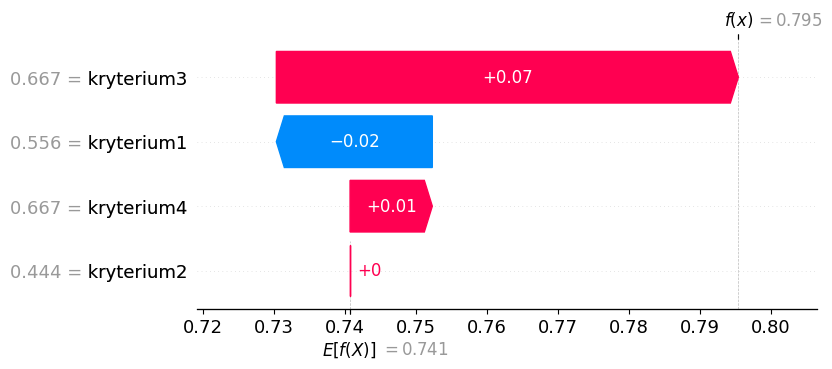


SHAP values dla wariantu 138:


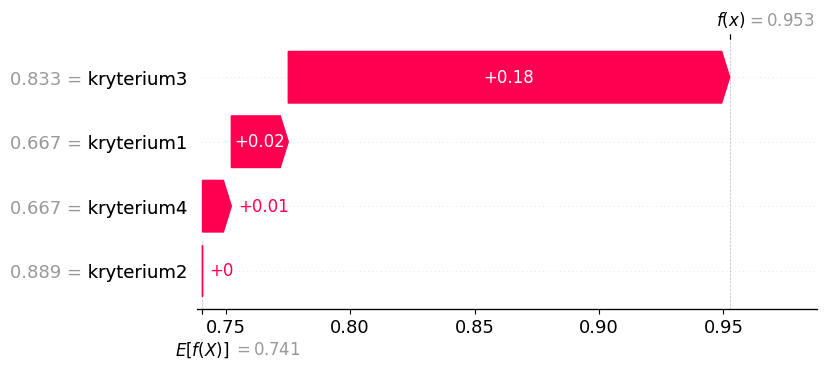

In [18]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt

# --- Przygotowanie danych ---

# Zakładam, że masz X_train i X_test (mogą być numpy.ndarray lub DataFrame)
# Jeśli są ndarray, konwertujemy je na DataFrame i podaj nazwy cech (dopasuj do swojego przypadku)
feature_names = ['kryterium1', 'kryterium2', 'kryterium3', 'kryterium4']  # przykład, podmień

if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=feature_names)

if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=feature_names)

# 1. Wybór 3 losowych wariantów z X_test
np.random.seed(42)
indices = np.random.choice(len(X_test), size=3, replace=False)
selected_variants = X_test.iloc[indices]

print("Wybrane warianty:")
print(selected_variants)

# 2. Funkcja predykcji klas i wartości użyteczności z modelu ANN-UTADIS
def predict_class_ann_utadis(model, X, thresholds):
    X_inputs = [X.iloc[:, i].values.reshape(-1, 1) for i in range(X.shape[1])]
    utilities = model.predict(X_inputs).flatten()
    classes = np.digitize(utilities, bins=thresholds)
    return classes, utilities

# Progi decyzyjne dla klas (dla 2 klas, możesz dodać więcej)
thresholds = [0.5]

predicted_classes, utilities = predict_class_ann_utadis(model, selected_variants, thresholds)

print("\nPredykcje klas i wartości użyteczności:")
for i, idx in enumerate(indices):
    print(f"Wariant {idx}: Klasa={predicted_classes[i]}, Użyteczność={utilities[i]:.4f}")

# 3. Funkcja obliczająca minimalną zmianę kryterium, by zmienić klasę wariantu

def minimal_change_to_flip_class(model, x, current_class, thresholds, feature_idx):
    x_inputs = [x[i].reshape(1, 1) for i in range(len(x))]
    u = model.predict(x_inputs)[0, 0]
    
    if current_class == 0:
        target_threshold = thresholds[0]
    elif current_class == len(thresholds):
        target_threshold = thresholds[-1]
    else:
        upper = thresholds[current_class] if current_class < len(thresholds) else None
        target_threshold = upper
    
    eps = 1e-5
    x_up = x.copy()
    x_up[feature_idx] += eps
    x_up_inputs = [x_up[i].reshape(1, 1) for i in range(len(x_up))]
    u_up = model.predict(x_up_inputs)[0, 0]
    
    grad = (u_up - u) / eps
    if grad == 0:
        print("Gradient zerowy, nie można wyliczyć minimalnej zmiany.")
        return None
    
    delta_u = target_threshold - u
    minimal_delta_feature = delta_u / grad
    
    return minimal_delta_feature

# 4. Test zmiany cechy i sprawdzenie, czy klasa się zmienia

def test_feature_change_and_predict(model, x, feature_idx, delta, thresholds):
    x_new = x.copy()
    x_new[feature_idx] += delta
    x_new_df = pd.DataFrame([x_new], columns=X_test.columns)
    return predict_class_ann_utadis(model, x_new_df, thresholds)[0][0]

print("\nTesty zmiany cech (dla pierwszego wariantu):")
for f_idx in range(len(X_test.columns)):
    delta = minimal_change_to_flip_class(model, selected_variants.iloc[0].values, predicted_classes[0], thresholds, f_idx)
    if delta is not None:
        new_class = test_feature_change_and_predict(model, selected_variants.iloc[0].values, f_idx, delta, thresholds)
        print(f" Kryterium {X_test.columns[f_idx]}: minimalna zmiana = {delta:.4f}, nowa klasa = {new_class}")

# 5. Wyjaśnienia predykcji za pomocą SHAP (KernelExplainer)

# Opakowanie model.predict w funkcję zwracającą 1D array
def f(X):
    # X shape: (n_samples, 4)
    X_inputs = [X[:, i].reshape(-1, 1) for i in range(X.shape[1])]
    preds = model.predict(X_inputs).flatten()
    return preds


# Tworzymy explainer na małej próbce z X_train
explainer = shap.KernelExplainer(f, shap.utils.sample(X_train, 100))

shap_values = explainer.shap_values(selected_variants)

for i, idx in enumerate(indices):
    print(f"\nSHAP values dla wariantu {idx}:")
    shap.waterfall_plot(
        shap.Explanation(
            values=shap_values[i],
            base_values=explainer.expected_value,
            data=selected_variants.iloc[i].values,
            feature_names=X_test.columns
        )
    )


R2 score surrogate model (train): 0.9473807122390937


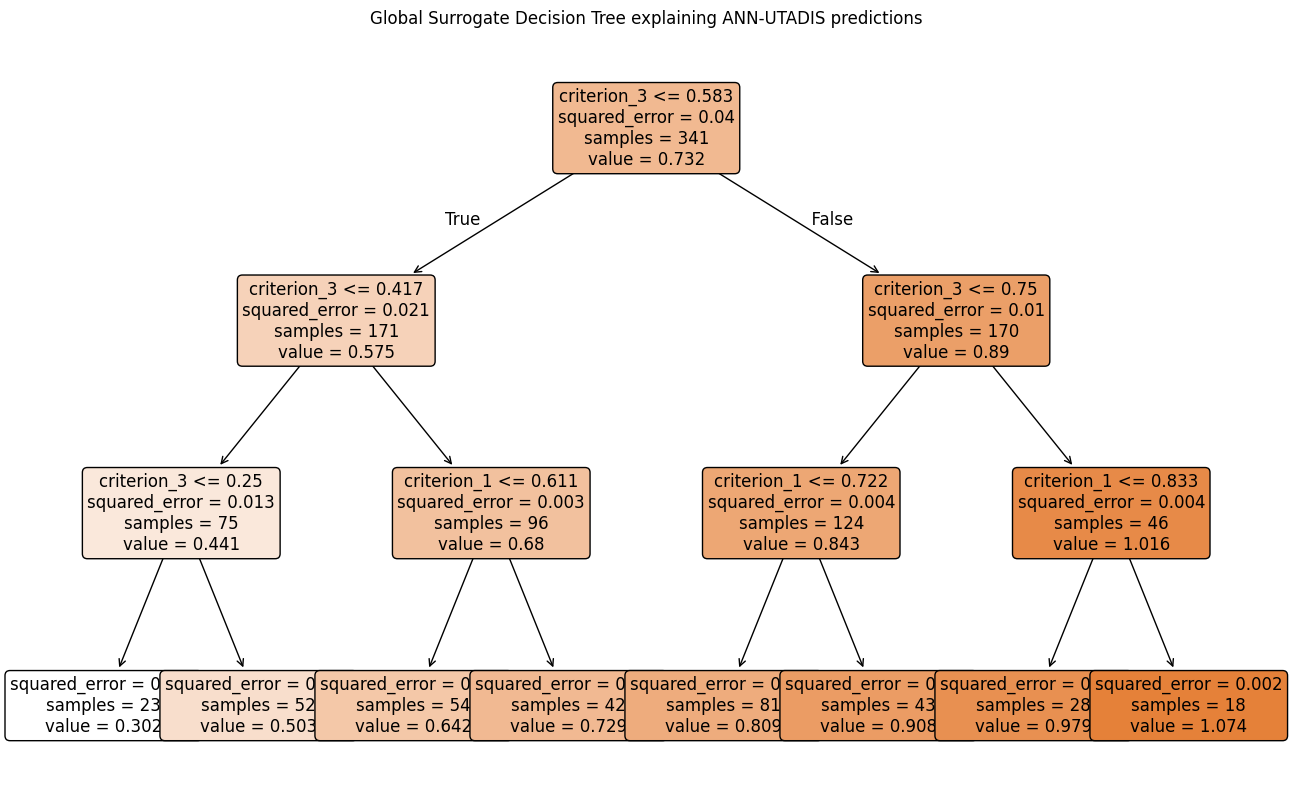

Ważność cechy criterion_1: 0.0425
Ważność cechy criterion_2: 0.0000
Ważność cechy criterion_3: 0.9575
Ważność cechy criterion_4: 0.0000


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

surrogate = DecisionTreeRegressor(max_depth=3, random_state=42)
surrogate.fit(X_train, U_train)

# Ocena dopasowania surrogate modelu
U_train_pred = surrogate.predict(X_train)
print("R2 score surrogate model (train):", r2_score(U_train, U_train_pred))

plt.figure(figsize=(16,10))
plot_tree(surrogate, feature_names=['criterion_1', 'criterion_2', 'criterion_3', 'criterion_4'],
          filled=True, rounded=True, fontsize=12)
plt.title("Global Surrogate Decision Tree explaining ANN-UTADIS predictions")
plt.show()

import pandas as pd
import numpy as np

importances = surrogate.feature_importances_
for f, imp in zip(['criterion_1', 'criterion_2', 'criterion_3', 'criterion_4'], importances):
    print(f"Ważność cechy {f}: {imp:.4f}")


## Siec neuronowa

C:\Users\oskki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\oskki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
ANN - Accuracy: 0.9320, F1: 0.9505, AUC: 0.9789


C:\Users\oskki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\shap\explainers\_deep\deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
C:\Users\oskki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(100, 4))']
  warnings.warn(msg)
C:\Users\oskki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received:

<Figure size 640x480 with 0 Axes>

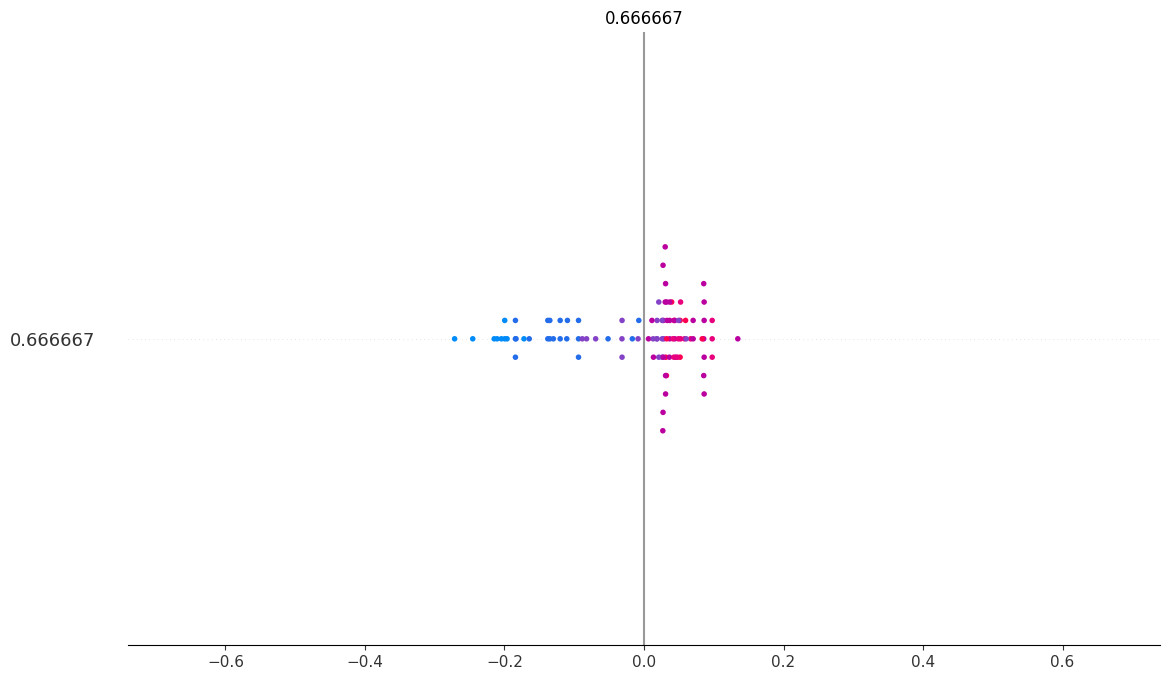

C:\Users\oskki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(100, 4))']
  warnings.warn(msg)
C:\Users\oskki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(50, 4))']
  warnings.warn(msg)
C:\Users\oskki\AppData\Local\Temp\ipykernel_17548\2878273360.py:61: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_valu

<Figure size 640x480 with 0 Axes>

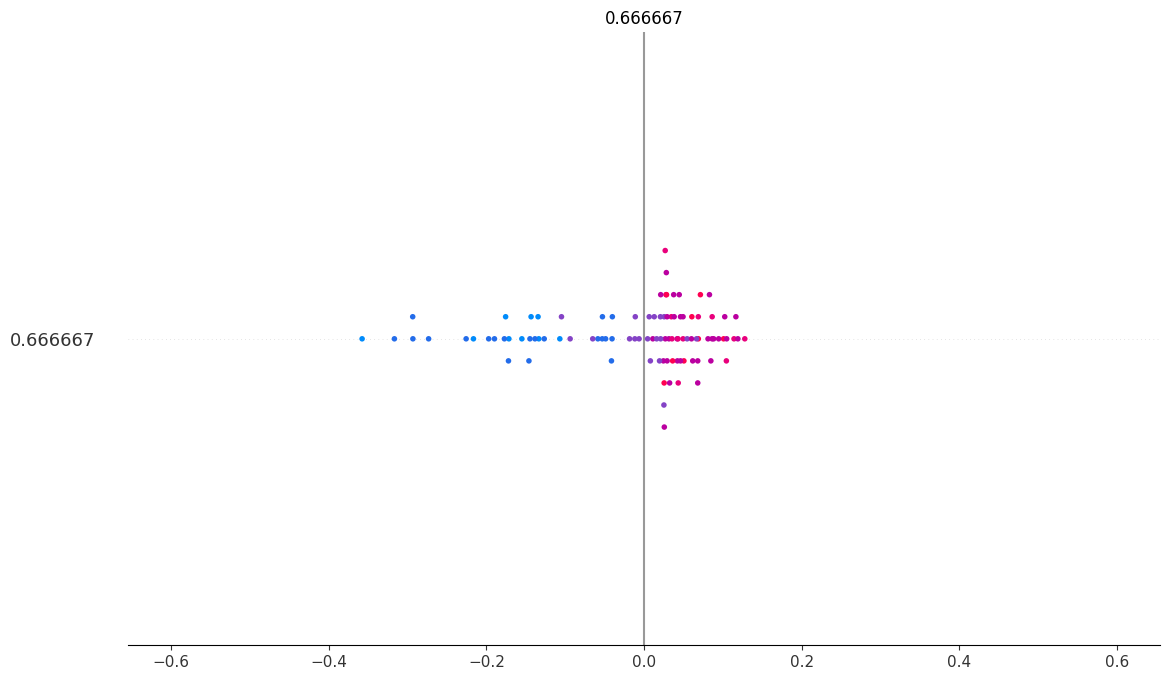


Explanation for test instance index 4:
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


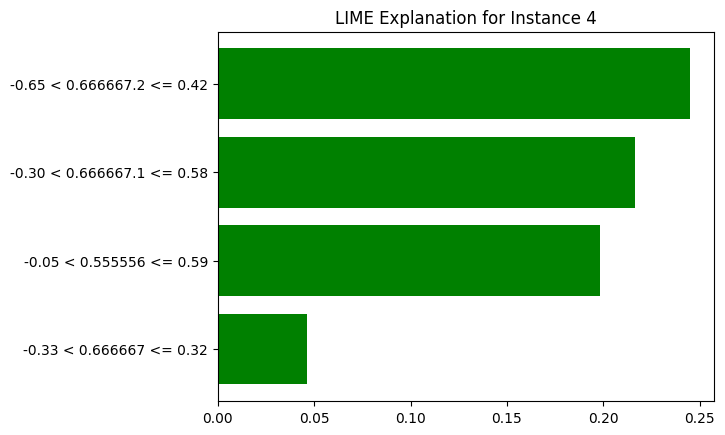


Explanation for test instance index 58:
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


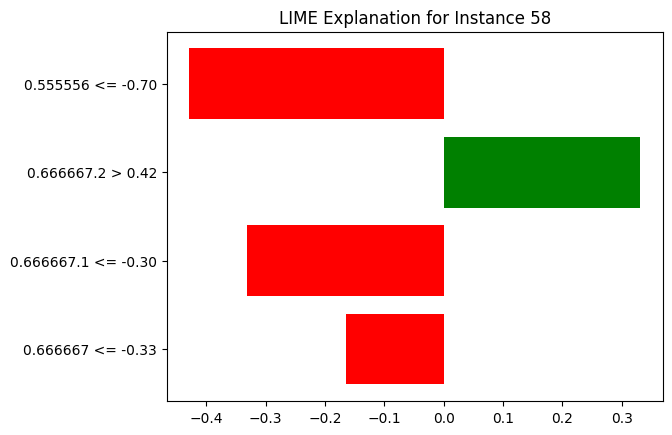


Explanation for test instance index 20:
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


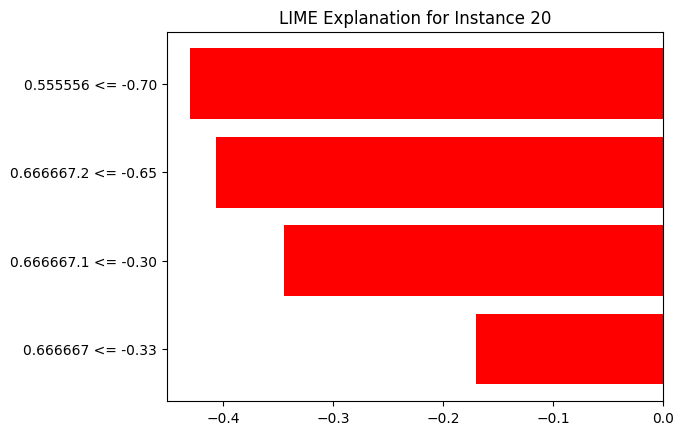

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import shap
import matplotlib.pyplot as plt

# 1. Wczytanie danych i przygotowanie
df = pd.read_csv('data/employee selection.csv')
X = df.iloc[:, :-1].values
y_raw = df.iloc[:, -1].values.astype(int)

y = (y_raw >= 5).astype(int)  # Twoja binarizacja

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# 2. Budowa i trenowanie modelu ANN
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=150, batch_size=16, validation_split=0.2, verbose=0)

# 3. Ocena jakości
y_prob = model.predict(X_test).flatten()
y_pred = (y_prob > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print(f"ANN - Accuracy: {acc:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

# 4. Interpretacja modelu z SHAP (DeepExplainer dla Keras)

explainer = shap.DeepExplainer(model, X_train[:100])  # wybierz próbkę treningową
shap_values = explainer.shap_values(X_test[:100])    # interpretuj na fragmencie testu

shap.summary_plot(shap_values, X_test[:100], feature_names=df.columns[:-1])

explainer = shap.GradientExplainer(model, X_train[:100])
shap_values = explainer.shap_values(X_test[:100])

shap.summary_plot(shap_values, X_test[:100], feature_names=df.columns[:-1])

import lime
import lime.lime_tabular

# Tworzymy obiekt explainer dla tabularnych danych
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    feature_names=df.columns[:-1],
    class_names=['class_0', 'class_1'],
    mode='classification'
)

np.random.seed(69)
indices = np.random.choice(len(X_test), size=3, replace=False)

def predict_fn_proba(x):
    proba_class_1 = model.predict(x).flatten()
    proba_class_0 = 1 - proba_class_1
    return np.vstack([proba_class_0, proba_class_1]).T

for i in indices:
    print(f"\nExplanation for test instance index {i}:")
    exp = explainer_lime.explain_instance(
        data_row=X_test[i],
        predict_fn=predict_fn_proba,
        num_features=4  # możesz zmienić na ile cech chcesz widzieć
    )
    exp.show_in_notebook(show_table=True)
    exp.as_pyplot_figure()
    plt.title(f"LIME Explanation for Instance {i}")
    plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 10%|█         | 1/10 [00:00<00:02,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 20%|██        | 2/10 [00:00<00:01,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 30%|███       | 3/10 [00:00<00:01,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 40%|████      | 4/10 [00:00<00:01,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 50%|█████     | 5/10 [00:01<00:01,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 60%|██████    | 6/10 [00:01<00:00,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 70%|███████   | 7/10 [00:01<00:00,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 80%|████████  | 8/10 [00:01<00:00,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 90%|█████████ | 9/10 [00:02<00:00,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


100%|██████████| 10/10 [00:02<00:00,  3.84it/s]
C:\Users\oskki\AppData\Local\Temp\ipykernel_4416\2076990188.py:6: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, shap.sample(X_test, 10), feature_names=feature_names)
C:\Users\oskki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\shap\plots\_beeswarm.py:726: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


<Figure size 640x480 with 0 Axes>

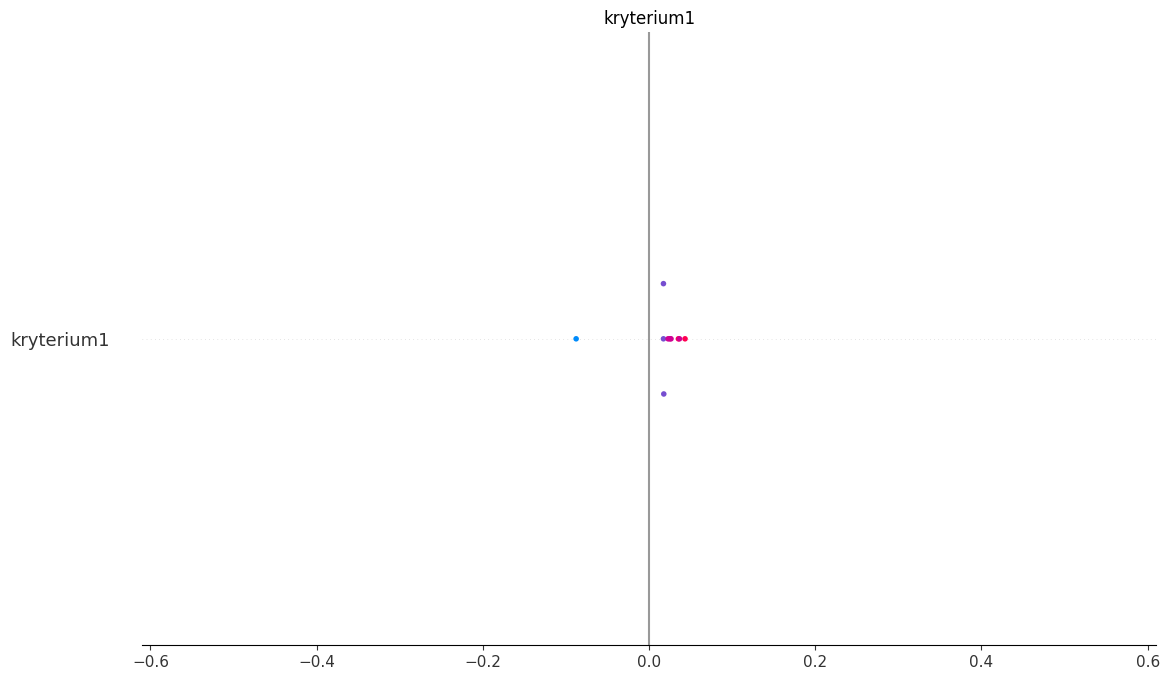

In [34]:
import shap

explainer = shap.KernelExplainer(model.predict, shap.sample(X_train, 100))
shap_values = explainer.shap_values(shap.sample(X_test, 10))

shap.summary_plot(shap_values, shap.sample(X_test, 10), feature_names=feature_names)

C:\Users\oskki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Accuracy: 0.9456
F1 score: 0.9604
AUC: 0.9848


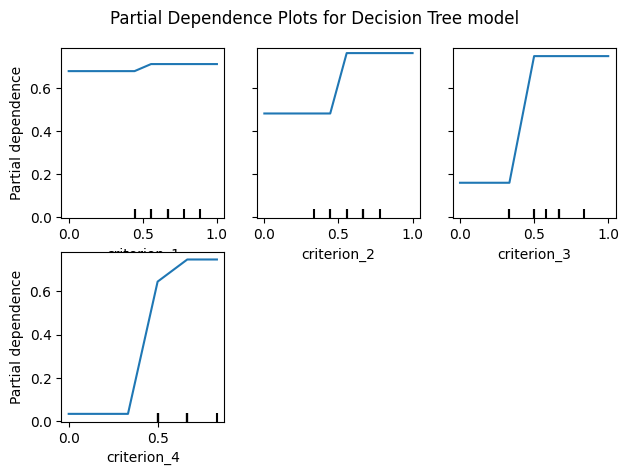

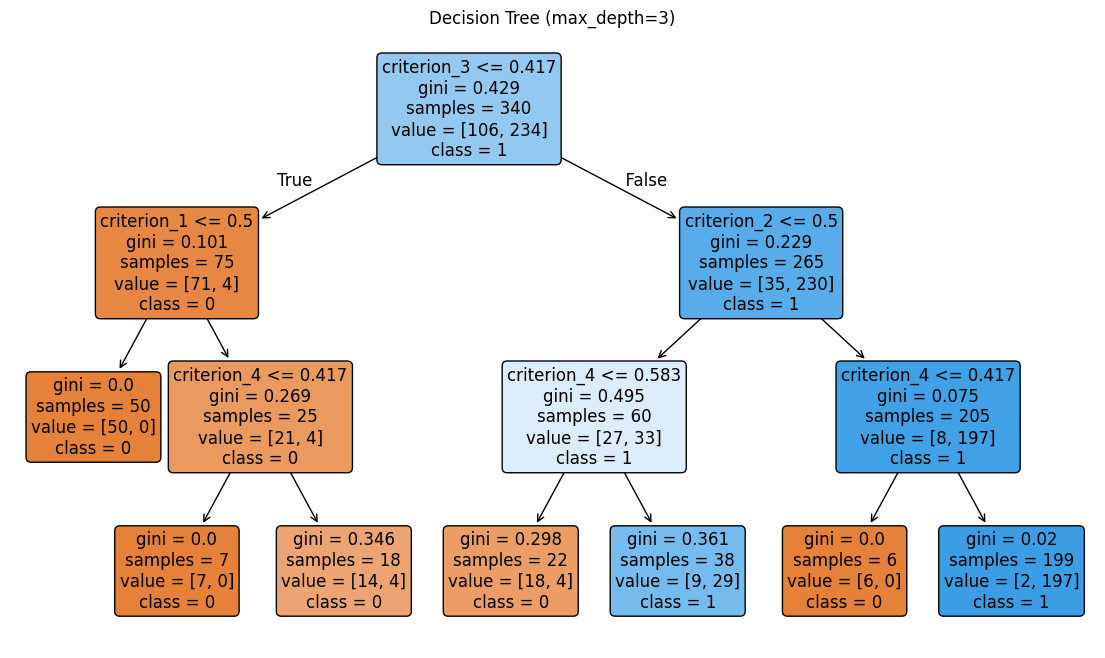

Ważność cechy criterion_1: 0.0074
Ważność cechy criterion_2: 0.1358
Ważność cechy criterion_3: 0.6720
Ważność cechy criterion_4: 0.1848


In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# --- 1. Wczytanie danych z CSV ---
# Podmień 'employee_selection.csv' na nazwę Twojego pliku
df = pd.read_csv('data/employee selection.csv')

df.columns = ['criterion_1', 'criterion_2', 'criterion_3', 'criterion_4', 'class']

# Binaryzacja klasy (ostatnia kolumna)
df['binary_class'] = (df['class'] >= 5).astype(int)

# Wybieramy tylko kolumny z kryteriami i nową klasę
feature_names = ['criterion_1', 'criterion_2', 'criterion_3', 'criterion_4']
X = df[feature_names].values
y = df['binary_class'].values

# --- 2. Podział na train/test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# --- 3. Definicja i trenowanie modelu sieci neuronowej ---
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=150, batch_size=16, verbose=0)

# --- 4. Ewaluacja ---
y_pred_proba = model.predict(X_test).flatten()
y_pred = (y_pred_proba >= 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {acc:.4f}")
print(f"F1 score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# --- 5. Decision Tree do interpretacji ---
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# Partial Dependence Plot
PartialDependenceDisplay.from_estimator(dt_model, X_train, features=[0,1,2,3],
                                       feature_names=feature_names, grid_resolution=20)
plt.suptitle("Partial Dependence Plots for Decision Tree model")
plt.tight_layout()
plt.show()

# Schemat drzewa
plt.figure(figsize=(14,8))
plot_tree(dt_model, feature_names=feature_names, class_names=['0', '1'],
          filled=True, rounded=True, fontsize=12)
plt.title("Decision Tree (max_depth=3)")
plt.show()

# Ważności cech drzewa
importances = dt_model.feature_importances_
for f, imp in zip(feature_names, importances):
    print(f"Ważność cechy {f}: {imp:.4f}")
